In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("3.01.+Country+clusters.csv")
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


# Plot the Data

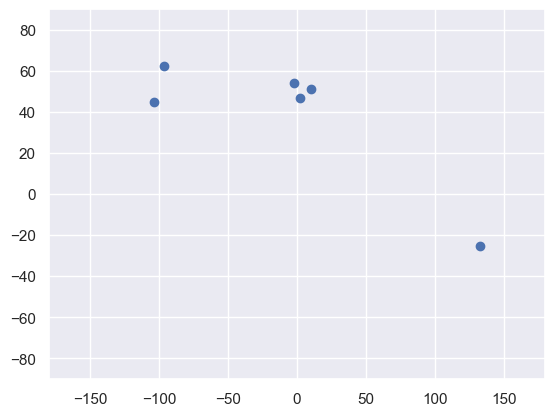

In [3]:
plt.scatter(data["Longitude"], data["Latitude"])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

# Select the Features

In [4]:
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


# Clustering

In [5]:
kmeans = KMeans(2) # we want to 2 cluster, that's why the input is 2

In [6]:
kmeans.fit(x)

C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

# Clustering Results

- #### fit_predicts(x) returns the cluster predictions in an array

In [7]:
identifed_clusters = kmeans.fit_predict(x)
identifed_clusters

C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 1])

In [8]:
data_with_clusters = data.copy()
data_with_clusters["Cluster"] = identifed_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


# Plot the New Data

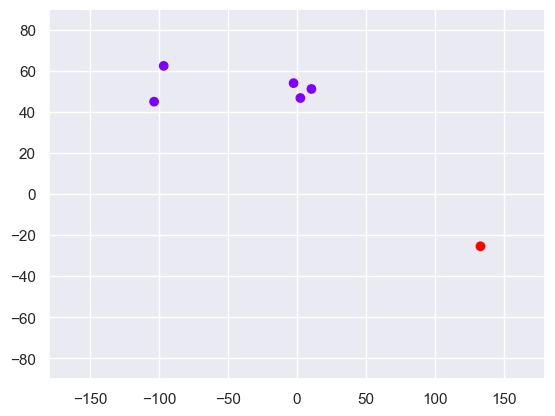

In [9]:
# Noktalar için küme sayısı kadar renk olmasını belirttik. 
plt.scatter(data_with_clusters["Longitude"], data_with_clusters["Latitude"], c=data_with_clusters["Cluster"], cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# KMeans with 3 Clusters

In [10]:
new_kmeans = KMeans(3)
new_kmeans.fit(x)

C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [11]:
new_clusters = new_kmeans.fit_predict(x)
new_clusters

C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 1, 1, 1, 2])

In [12]:
dt = data.copy()
dt["ClustersWith3"] = new_clusters
dt

,Country,Latitude,Longitude,Language,ClustersWith3
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


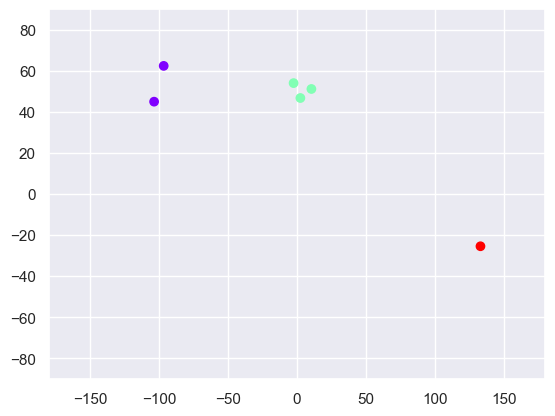

In [13]:
plt.scatter(dt["Longitude"], dt["Latitude"], c=dt["ClustersWith3"], cmap="rainbow")
plt.xlim(-180, 180)
plt.ylim(-90,90)
plt.show()

# Selecting the Number of clusters

## WCSS

In [16]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\oguzk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

## The Elbow method

In [18]:
number_clusters = range(1,7)

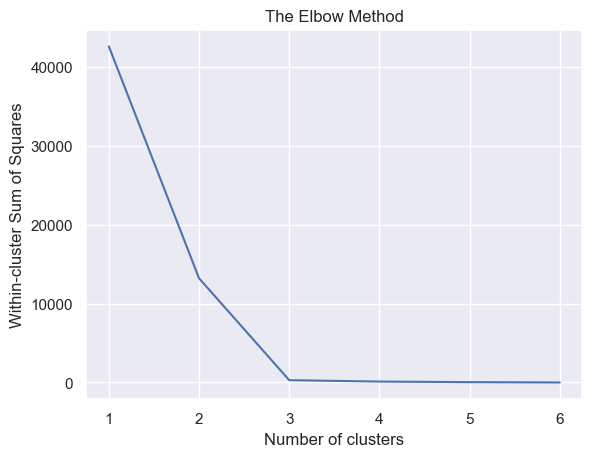

In [20]:
plt.plot(number_clusters, wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster Sum of Squares")
plt.show()